# Welcome to 2019 M&M Short Course X-15
## Data Analysis in Materials Science with

<br/>
<br/>
<img style='margin:auto;' src='img/hyperspy_banner.png'/>
<br/>

### Presented by (a selection of) the HyperSpy developers:
- Duncan Johnstone
- Katherine MacArthur
- Magnus Nord
- Eric Prestat
- Joshua Taillon

# Session 1: An Introduction to Python and  HyperSpy:
## The multi-dimensional data analysis toolbox

### <br/>
### Josh Taillon
#### *August 4, 2019*

# NIST Disclaimer

*Certain commercial equipment, instruments, materials, vendors, and
software are identified in this talk for example purposes and to foster
understanding. Such identification does not imply recommendation or
endorsement by the National Institute of Standards and Technology, nor
does it imply that the materials or equipment identified are necessarily the
best available for the purpose.*

## <a id='top'></a> Outline

1. <a href='#intro'> Intro</a>
2. <a href='#starting'> Getting Started</a>
2. <a href='#signal'> The Signal Class</a>
3. <a href='#io'> Input/Output</a>
4. <a href='#EM'> Electron Microscopy Tools</a>
5. <a href='#EDS'> EDS Processing</a>
6. <a href='#EELS'> EELS Processing</a>
7. <a href='#extending'> Extensibility</a>
8. <a href='#demos'> Interactive Demos</a>

#### Import hyperspy

In [22]:
%matplotlib notebook
import hyperspy.api as hs
import numpy as np

#### Disable warnings for presentation:

In [2]:
import logging
hs_logger = logging.getLogger('hyperspy') 
hs_logger.setLevel(logging.ERROR)

## A quick note first:

## This isn't your parents' Powerpoint...

## ...because everything is interactive!

In [28]:
import datetime
import time
datestring = datetime.datetime.now().strftime('%B %d, %Y')
for c in 'Today is {}!'.format(datestring):
    print(c, end='')
    time.sleep(.1)

Today is July 28, 2019!

<IPython.core.display.Javascript object>


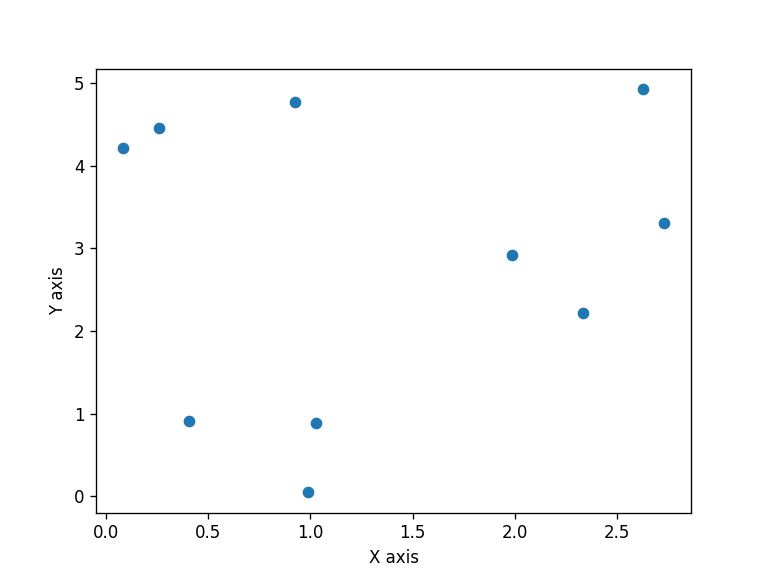

In [31]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

lineplot = plt.plot(3 * np.random.rand(10), 5 * np.random.rand(10),'o')
plt.xlabel("X axis"); plt.ylabel("Y axis");

## Made possible with:

* Jupyter notebook &mdash; https://jupyter.org/

* RISE (Reveal.js IPython/Jupyter Slideshow Extension) &mdash; https://github.com/damianavila/RISE

# <img style='display:inline-block;' src='img/python_just_logo.svg' width=125/> &nbsp; What is this "Python" that I've heard of?

## What is &nbsp; <img src="img/python_logo.svg" width=300px style="display: inline-block;">  ?

- High-level, *general purpose* programming language with "batteries included"

- Simple enough for quick scripts; featured enough for complex projects

- Used extensively on the web, in applications, and throughout science

- Syntax emphasizes readability and explicitness 

## A "Hello, World!" comparison:

### Java:

```java
public class HelloWorld {

    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }

}
```

### C++:
   
```c++
#include <iostream>
using namespace std;

int main() {
    cout << "Hello, World!" << endl;
    return 0;
}
```

### Python:

```python
print("Hello, World!")
```

### Matlab:

```OCTAVE
disp("Hello, World!")
```

## Okay, but what does this have to do with science?

The "scientific Python" ecosystem provides almost any functionality you may need:

<div style="margin:auto; text-align:center;">
  <img style="display:inline-block" alt="Python" class="plain" src="img/python_just_logo.svg" width="200px"/>&nbsp;&nbsp;&nbsp;&nbsp;
  <img style="display:inline-block; " alt="NumPy" class="plain" src="img/numpy_logo.svg" width="200px"/> &nbsp;&nbsp;&nbsp;&nbsp;
  <img style="display:inline-block;" alt="Jupyter" class="plain" src="img/jupyter_logo.svg" width="200px"/>&nbsp;&nbsp;&nbsp;&nbsp;
  <img style="display:inline-block;" alt="SciPy" class="plain" src="img/scipy_logo.svg" width="200px"/>
</div>
<div style="margin:auto; text-align:center;">
  <img style="display:inline-block;" alt="Matplotlib" class="plain" src="img/mpl.svg" width="350px"/>&nbsp;&nbsp;&nbsp;&nbsp;
  <img style="display:inline-block;" alt="SymPy" class="plain" src="img/sympy_logo.svg" width="200px"/> &nbsp;&nbsp;&nbsp;&nbsp;
  <img style="display:inline-block;" alt="pandas" class="plain" src="img/pandas_logo.png" width="450px"/>&nbsp;&nbsp;&nbsp;&nbsp;
  <img style="display:inline-block;" alt="scikit-learn" class="plain" src="img/scikit-learn_logo.svg" width="300px"/>
</div>

## Linear algebra, optimization, machine learning...

- Numerical computing with [`NumPy`](https://www.numpy.org) (like what you would use Matlab for): &nbsp;&nbsp;&nbsp;&nbsp;
 <img style="display:inline-block; " alt="NumPy" src="img/numpy_logo.svg" width="150px"/> 

- Signal processing, numerical integration, optimization, etc. with [`SciPy`](https://scipy.org): &nbsp;&nbsp;&nbsp;&nbsp;
 <img style="display:inline-block; " alt="SciPy" src="img/scipy_logo.svg" width="150px"/> 

- Machine learning with [`scikit-learn`](https://scikit-learn.org/stable/) (and others): &nbsp;&nbsp;&nbsp;&nbsp;
 <img style="display:inline-block; " alt="scikit-learn" src="img/scikit-learn_logo.svg" width="200px"/> 

## Visualization, statistics, computer algebra...

- Scientific visualization with [`matplotlib`](https://matplotlib.org): &nbsp;&nbsp;&nbsp;&nbsp;
 <img style="display:inline-block; " alt="matplotlib" src="img/mpl.svg" width="400px"/> 

- Data series and statistical analysis with [`pandas`](https://pandas.pydata.org/): &nbsp;&nbsp;&nbsp;&nbsp;
 <img style="display:inline-block; " alt="pandas" src="img/pandas_logo.png" width="400px"/> 

- Symbolic computation with [`SymPy`](https://www.sympy.org/en/index.html): &nbsp;&nbsp;&nbsp;&nbsp;
 <img style="display:inline-block; " alt="sympy" src="img/sympy_logo.svg" width="200px"/> 

## A better (?) way to create and publish your work

- Literate programming using a notebook interface with [*Jupyter*](https://jupyter.org/): &nbsp;&nbsp;&nbsp;&nbsp;
 <img style="display:inline-block; " alt="sympy" src="img/jupyter_logo.svg" width="200px"/> 
  

- Creation of interactive computational analysis documents (not just scripts):
    - Facilitates reproducability
    - Makes analyses more accessible (anyone can recreate your figure)

- Easy to contribute back to the "open source" scientific ecosystem

## Can't I just use Matlab?

<img src="img/py_matlab_comparison.svg" style='margin:auto; text-align:center;' width=70%/>

## File Exchange is good, but...

<img src="img/matlab_filexchange.png" style='margin:auto; text-align:center;' width=70%/>

## Distributing code is simple in the Python community

### (and integrated directly into Python tools)

- &nbsp;&nbsp;&nbsp;&nbsp;<img src='img/github_logo.svg' style="display:inline-block;" width="200px">&nbsp;: Community standard is to (at least) release code on GitHub (or similar service)


- &nbsp;&nbsp;&nbsp;&nbsp;<img src='img/pypi_logo.svg' style="margin:20px;display:inline-block;" width="200px">: Placing into the PyPI, the **Py**thon **P**ackage **I**ndex enables installing with simple: 
    - `pip install my-awesome-package`

- &nbsp;&nbsp;&nbsp;&nbsp;<img src='img/anaconda_logo.png' style="margin:20px;display:inline-block;" width="200px">: Anaconda enables multiple environments and complex dependency management
    - `conda install my-awesome-package`

## What does it mean to be "open source"?

  <blockquote style="font-size:xx-large; width:90%">
    …something people can modify and share because its design is publicly accessible
    <br/><br/>
    <footer><a href="https://opensource.com/resources/what-open-source">opensource.com</a></footer>
  </blockquote>

## What about "open science"?

  <blockquote style="font-size:xx-large; width:90%">
    …science must be done in an open, and reproducible fashion where all components of research are open
    <br/><br/>
    <footer><a href="https://opensource.com/resources/open-science">Marcus Hanwell (also opensource.com)</a></footer>
  </blockquote>

## Open-source in the microscopy ecosystem:


<table id="ecosystem" style="font-size:xx-large;">
  <tr style="font-weight:bold;">
    <td class="section-label" colspan="2">General Purpose</td>
    <!-- <th></th> -->
    <td class="section-label" colspan="2">Others</td>
  </tr>
  <tr>
    <td class="label-col">HyperSpy</td>
    <td class="link-col"><a href="http://hyperspy.org/">http://hyperspy.org/</a></td>
    <!-- <td></td> -->
    <td class="label-col">PyQSTEM</td>
    <td class="link-col"><a href="https://github.com/jacobjma/PyQSTEM">https://github.com/jacobjma/PyQSTEM</a></td>
  </tr>
  <tr>
    <td class="label-col">Nion Swift</td>
    <td class="link-col"><a href="https://nionswift.readthedocs.io/en/stable/">https://nionswift.readthedocs.io/en/stable/</a></td>
    <!-- <td></td> -->
    <td class="label-col">HRTEMFringe<br/>Analyzer</td>
    <td class="link-col"><a href="https://github.com/ialxn/HRTEMFringeAnalyzer">https://github.com/ialxn/HRTEMFringeAnalyzer</a></td>
  </tr>
  <tr>
    <td class="label-col">pycroscopy</td>
    <td class="link-col"><a href="https://github.com/pycroscopy/pycroscopy">https://github.com/pycroscopy/pycroscopy</a></td>
    <!-- <td></td> -->
    <td class="label-col">Atomap</td>
    <td class="link-col"><a href="https://atomap.org/">https://atomap.org/</a></td>
  </tr>

  <tr style="line-height:0.5em;">
    <td>&nbsp;</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
  </tr>

  <tr style="font-weight:bold;">
    <td class="section-label" colspan="2">Pixelated STEM</td>
    <!-- <td></td> -->
    <td class="section-label" colspan="2">Tomography</td>
  </tr>
  <tr>
    <td class="label-col">pyXem</td>
    <td class="link-col"><a href="https://pyxem.github.io/pyxem/">https://pyxem.github.io/pyxem/</a></td>
    <!-- <td></td> -->
    <td class="label-col">tomopy</td>
    <td class="link-col"><a href="https://tomopy.readthedocs.io/en/latest/">https://tomopy.readthedocs.io/en/latest/</a></td>
  </tr>
  <tr>
    <td class="label-col">pixStem</td>
    <td class="link-col"><a href="https://pixstem.org/">https://pixstem.org/</a></td>
    <!-- <td></td> -->
    <td class="label-col">tomotools</td>
    <td class="link-col"><a href="https://github.com/AndrewHerzing/tomotools">https://github.com/AndrewHerzing/tomotools</a></td>
  </tr>
  <tr>
    <td class="label-col">LiberTEM</td>
    <td class="link-col"><a href="https://github.com/LiberTEM/LiberTEM">https://github.com/LiberTEM/LiberTEM</a></td>
    <!-- <td></td> -->
    <td class="label-col">tomviz</td>
    <td class="link-col"><a href="https://tomviz.org/">https://tomviz.org/</a></td>
  </tr>
  <tr>
    <td class="label-col">fpd</td>
    <td class="link-col"><a href="https://gitlab.com/fpdpy/fpd/">https://gitlab.com/fpdpy/fpd/</a></td>
    <!-- <td></td> -->
    <td class="label-col"></td>
    <td class="link-col"></td>
  </tr>
</table>

# <img style='display:inline-block;' src='img/hyperspy.svg' width=125/> &nbsp; What is HyperSpy, anyway?

## What is &nbsp; <img style='display:inline-block;' src='img/hyperspy_banner.png'/> &nbsp; ?

* Open-source Python library for interactive data analysis of multi-dimensional datasets

- Leverages the Scientific Python ecosystem for much of its functionality:
    - <img style="display:inline-block" alt="Python" class="plain" src="img/python_just_logo.svg" height=100 width=100/> &nbsp;&nbsp;
    <img style="display:inline-block; " alt="NumPy" class="plain" src="img/numpy_logo.svg" height=100 width=100/> &nbsp;&nbsp;
  <img style="display:inline-block;" alt="Jupyter" class="plain" src="img/jupyter_logo.svg" height=100 width=100/> &nbsp;&nbsp;
  <img style="display:inline-block;" alt="SciPy" class="plain" src="img/scipy_logo.svg"  height=100 width=100/> &nbsp;&nbsp;
  <img style="display:inline-block;" alt="SymPy" class="plain" src="img/sympy_logo.svg"  height=100 width=100/> &nbsp;&nbsp;
  <img style="display:inline-block;" alt="scikit-learn" class="plain" src="img/scikit-learn_logo.svg"  height=100 width=150/> &nbsp;&nbsp;
  <img style="display:inline-block;" alt="Matplotlib" class="plain" src="img/mpl.svg" height=100 width=250/> &nbsp;&nbsp;

- Accessed like any other Python library:
```python
import numpy as np     ---->     import hyperspy.api as hs
```

## Why would you use &nbsp; <img style='display:inline-block;' src='img/hyperspy_banner.png'/> &nbsp; ?

* Makes it easy to operate on multi-dimensional arrays as you would a single spectrum (or image)

* Easy access to cutting-edge signal processing tools 

* Modular structure makes it easy to add custom features

- Use of Jupyter notebooks encourages reproducible and sharable analyses (FAIR data)

## Why would you use &nbsp; <img style='display:inline-block;' src='img/hyperspy_banner.png'/> &nbsp; ?

* Beyond generic signal processing, provides many tools specifically for electron microscopy:

<ul><ul><li>Provides facilities for easy access to proprietary software formats</li></ul></ul>


<ul>
    <ul>
        <li>EDS:</li>
        <ul>
            <li>Background removal</li>
            <li>Net intensity line map extraction</li>
            <li>Quantification (k-factor, ζ-factors, ionization cross sections)</li>
        </ul>
    </ul>
</ul>

## Why would you use &nbsp; <img style='display:inline-block;' src='img/hyperspy_banner.png'/> &nbsp; ?

* Beyond generic signal processing, provides many tools specifically for electron microscopy:

<ul>
    <ul>
        <li>EELS:</li>
        <ul>
            <li>Background removal</li>
            <li>Curve fitting for quantification (including ELNES)</li>
            <li>All of Egerton's famous methods</li>
        </ul>
    </ul>
</ul>

<ul>
    <ul>
        <li>"Advanced" methods:</li>
        <ul>
            <li>Multivariate statistical analysis</li>
            <li>General curve fitting</li>
            <li>Dimensionality reduction/signal separation</li>
        </ul>
    </ul>
</ul>

## Why &nbsp; <img src="img/python_logo.svg" width=300px style="display: inline-block;">?

* Quickly becoming the *de facto* standard of scientific computing

* Free (as in speech and as in beer)
    * No pesky licenses to checkout

* Vast array of scientific libraries available:
    * `pip install antigravity`

* Thanks to `numpy` and other libraries, similar (or often better) performance than MATLAB

## History of HyperSpy

- Developed by [Francisco de la Peña](http://umet.univ-lille1.fr/detailscomplets.php?id=614&lang=en) in 2007 &mdash; 2012 as part of his Ph.D. Thesis at<br/> Université Paris-Sud in Orsay, France

- See [Chapter 5](https://www.stem.lps.u-psud.fr/sites/default/files/F%20de%20la%20Pena%20Thesis.pdf#chapter.5) of the dissertation for a historical introduction

- Originally called EELSLab:
    
<center><img src="img/eelslab.png" width=40%></center>

## History of HyperSpy

* Open-sourced (on [Github](https://github.com/hyperspy/hyperspy)) in 2010:

<center><img src='img/hs_first_commit.png'/></center>

* Renamed to HyperSpy in 2011

- Now... over 350 citations, 37 releases, 38 contributors, 100K lines of Python code, and rapidly growing!

## Design philosophy of HyperSpy

* HyperSpy is a Python library, rather than standalone program
    * Part of the greater scientific Python ecosystem

* Enables and requires Python scientific stack (i.e. `numpy` and `scipy`)

* Data storage is in an open hierarchical format (HDF5)
    * Saves all metadata by default (including most processing steps)

* Analysis done via reproducible notebooks

* Feature development is completely open-source ([GPLv3](https://choosealicense.com/licenses/gpl-3.0/))

# <img style='display:inline-block;' src='img/hyperspy.svg' width=125/> &nbsp; Welcome to the community!

## The power of community

- One of the *best* parts of HyperSpy is the community that surrounds it (personal opinion)

- This software is made by researchers, for researchers

- HyperSpy is built from collaboration:

<ul>
    <ul>
        <li>By collaborating, we advance faster and avoid reinventing the wheel</li>
    </ul>
</ul>


## How to get help?

- HyperSpy website (www.hyperspy.org):

<center><img src="img/hs_website.png" width=60%></center>

## How to get help?

- HyperSpy website (www.hyperspy.org):

<center><img src="img/hs_website_links.svg" width=60%></center>

## How to get help?

- HyperSpy repository (https://github.com/hyperspy/hyperspy): <br/><br/>

<center><img src="img/hs_github.png" width=60%></center>

## How to get help?

- HyperSpy repository (https://github.com/hyperspy/hyperspy): <br/><br/>

<center><img src="img/hs_github_issues.svg" width=60%></center>

## How to get (more) help?

* Sessions like this (good job!)

* Expansive user guide and documentation: <br/>http://hyperspy.org/hyperspy-doc/current/user_guide/index.html

* Tutorials and demos: https://github.com/hyperspy/hyperspy-demos

* User group list: [hyperspy-users@googlegroups.com](https://groups.google.com/forum/#!forum/hyperspy-users)

- Gitter chat: https://gitter.im/hyperspy/hyperspy

- Developer guide (if you're into that sort of thing):<br/> http://hyperspy.org/hyperspy-doc/current/dev_guide/index.html#dev-guide-label

## Anyone can make HyperSpy better!

- HyperSpy repository (https://github.com/hyperspy/hyperspy): <br/><br/>

<center><img src="img/hs_github_PRs.svg" width=60%></center>

## What about general Python questions?

- There are vast numbers of resources about Python online (and in print):

<ul>
    <ul>
        <li>Official documentation: <a href="https://docs.python.org">https://docs.python.org</a></li>
    </ul>
</ul>

<ul>
    <ul>
        <li>Getting started with scientific Python: <a href="https://scipy-lectures.org">https://scipy-lectures.org</a></li>
    </ul>
</ul>

<ul>
    <ul>
        <li>NumPy for Matlab users:<br/><a href="https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html">https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html</a></li>
    </ul>
</ul>

- StackOverflow for general programming/Python questions: https://stackoverflow.com/

<center><img style='display:inline-block;' src='img/hyperspy.svg' width=200/> </center>

# <center>Thank you!</center>

<div style='text-align:center;margin:auto;'>Any questions?</div>